--- Agglomerative Hierarchical Clustering on Iris Dataset ---
Data Loaded: 150 samples, 4 features

--- Evaluation Metrics ---
Silhouette Score: 0.4467 (Higher is better, max 1.0)
Adjusted Rand Index: 0.6153 (Similarity to Ground Truth, max 1.0)

Plot generated. Close the plot window to finish script.


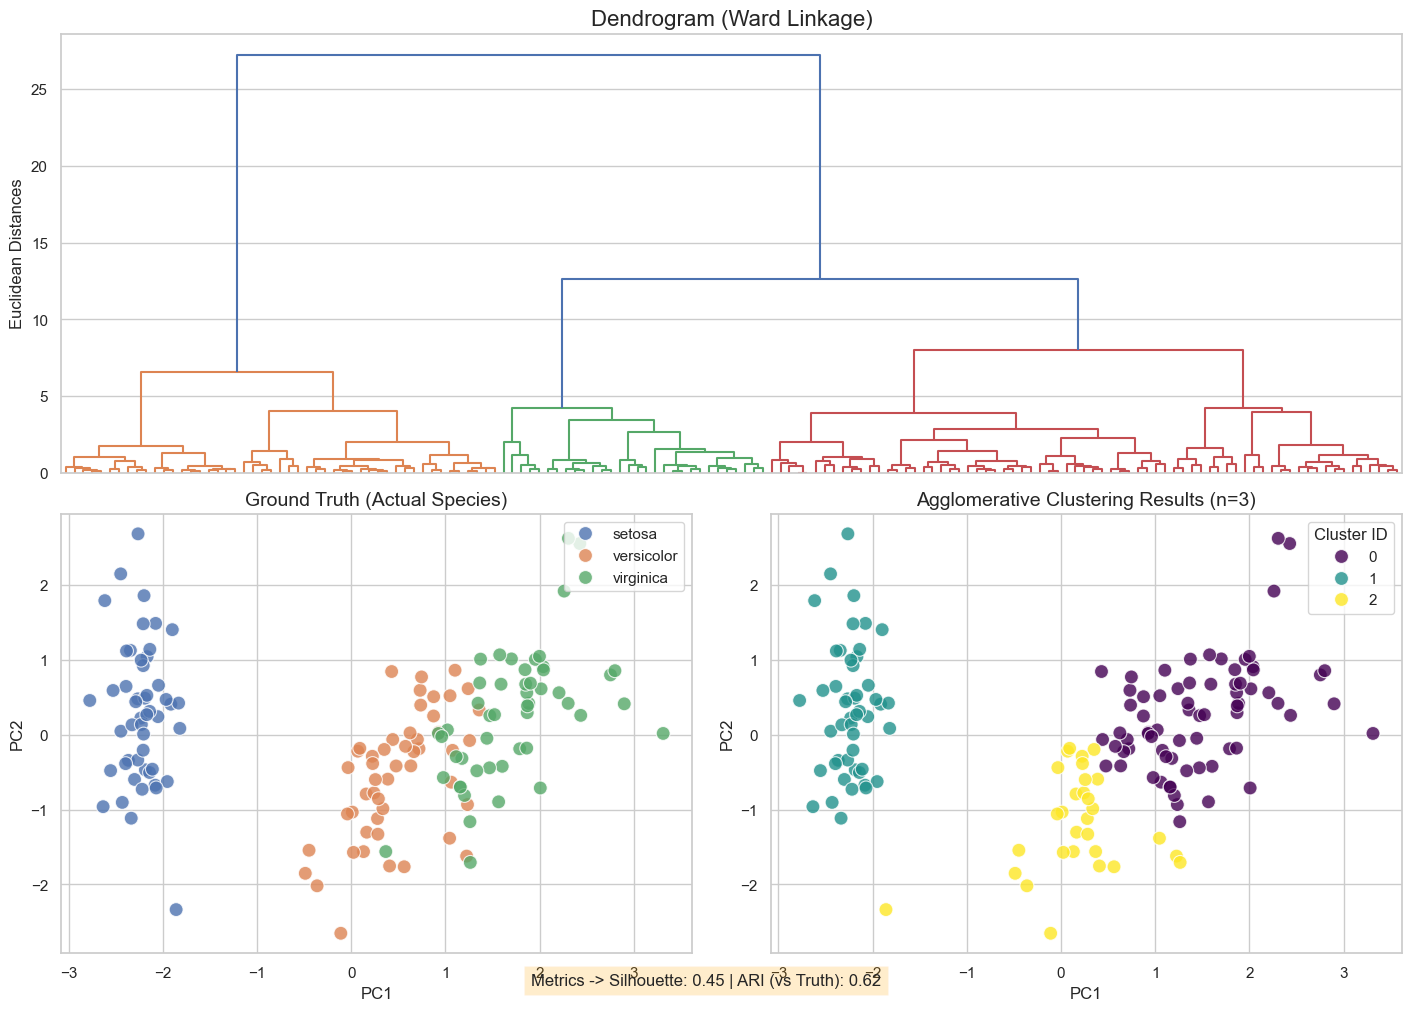

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as sch

# Set style for plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

def main():
    print("--- Agglomerative Hierarchical Clustering on Iris Dataset ---")

    # 1. Load Data
    iris = load_iris()
    X = iris.data
    y_true = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names
    
    # Create a DataFrame for easier handling
    df = pd.DataFrame(X, columns=feature_names)
    print(f"Data Loaded: {df.shape[0]} samples, {df.shape[1]} features")

    # 2. Preprocessing
    # Standardization is crucial for clustering so distance measures are not biased by scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Visualization Setup
    # We will create a figure with 3 subplots: Dendrogram, True Labels, Predicted Clusters
    fig = plt.figure(constrained_layout=True)
    gs = fig.add_gridspec(2, 2)
    
    # --- Plot 1: Dendrogram ---
    ax1 = fig.add_subplot(gs[0, :]) # Spans both columns at the top
    ax1.set_title("Dendrogram (Ward Linkage)", fontsize=16)
    ax1.set_ylabel("Euclidean Distances")
    
    # Calculate linkage matrix using Ward's method (minimizes variance within clusters)
    dendrogram = sch.dendrogram(
        sch.linkage(X_scaled, method='ward'),
        ax=ax1,
        no_labels=True, # Too many labels to read clearly
        color_threshold=10 # Threshold for coloring clusters (visual aid)
    )
    
    # 4. Fit Agglomerative Clustering Model
    # We know there are 3 species, so we set n_clusters=3
    cluster_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
    y_cluster = cluster_model.fit_predict(X_scaled)

    # 5. Dimension Reduction for Visualization (PCA)
    # Reduce 4D data to 2D to plot scatter charts
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # DataFrame for plotting
    plot_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    plot_df['True Label'] = [target_names[i] for i in y_true]
    plot_df['Cluster Label'] = y_cluster

    # --- Plot 2: Ground Truth (Actual Species) ---
    ax2 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(
        data=plot_df, x='PC1', y='PC2', hue='True Label', 
        palette='deep', s=100, alpha=0.8, ax=ax2
    )
    ax2.set_title("Ground Truth (Actual Species)", fontsize=14)
    ax2.legend(loc='upper right')

    # --- Plot 3: Agglomerative Clustering Results ---
    ax3 = fig.add_subplot(gs[1, 1])
    # Note: Cluster ID colors might not match Species colors 1-to-1 because clustering is unsupervised
    sns.scatterplot(
        data=plot_df, x='PC1', y='PC2', hue='Cluster Label', 
        palette='viridis', s=100, alpha=0.8, ax=ax3
    )
    ax3.set_title(f"Agglomerative Clustering Results (n=3)", fontsize=14)
    ax3.legend(loc='upper right', title="Cluster ID")

    # 6. Evaluation Metrics
    sil_score = silhouette_score(X_scaled, y_cluster)
    ari_score = adjusted_rand_score(y_true, y_cluster)

    print("\n--- Evaluation Metrics ---")
    print(f"Silhouette Score: {sil_score:.4f} (Higher is better, max 1.0)")
    print(f"Adjusted Rand Index: {ari_score:.4f} (Similarity to Ground Truth, max 1.0)")
    
    # Add text to plot
    plt.figtext(0.5, 0.02, 
                f"Metrics -> Silhouette: {sil_score:.2f} | ARI (vs Truth): {ari_score:.2f}", 
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    print("\nPlot generated. Close the plot window to finish script.")
    plt.show()

if __name__ == "__main__":
    main()



    
    